Energia máxima acumulada na mochila do Shenlong: 240.0
Fração de energia dos itens escolhidos: [1, 1, 0.6666666666666666]


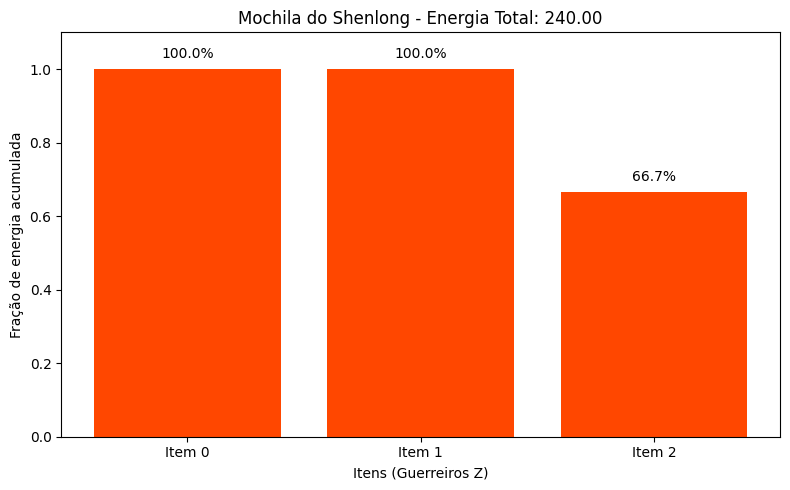

In [20]:
#Mochila Fracionária de Shenlong
import matplotlib.pyplot as plt

def mochila_do_shenlong(valores, pesos, capacidade_da_esfera):
    # Cria uma lista de itens: (valor, peso, valor_por_peso, índice)
    itens = [(valores[kame], pesos[kame], valores[kame] / pesos[kame], kame) for kame in range(len(valores))]
    
    # Ordena os itens pela razão valor/peso (descendente)
    itens.sort(key=lambda goku: goku[2], reverse=True)
    
    # Inicializa o valor total coletado (energia total)
    energia_total = 0.0
    # Inicializa a capacidade restante da mochila (capacidade da esfera)
    capacidade_restante = capacidade_da_esfera
    # Lista para armazenar as frações escolhidas de cada item
    frações_do_ki = [0] * len(valores)  # Fração de cada item (Ki utilizado)
    
    # Itera sobre a lista ordenada de itens
    for valor, peso, razão_ki, índice in itens:
        # Se o peso do item é menor ou igual à capacidade restante, pega tudo
        if peso <= capacidade_restante:
            energia_total += valor
            frações_do_ki[índice] = 1  # 100% do Ki usado
            capacidade_restante -= peso
        else:
            # Se o item não cabe inteiro, pega apenas a fração possível
            fração = capacidade_restante / peso
            energia_total += valor * fração
            frações_do_ki[índice] = fração
            break  # A esfera do dragão está cheia
    
    # Retorna o valor total e as frações usadas
    return energia_total, frações_do_ki

# Exemplo de uso
valores = [60, 100, 120]  # Valor de cada item (energia dos guerreiros)
pesos = [10, 20, 30]  # Peso de cada item (carga Ki)
capacidade_da_esfera = 50  # Capacidade máxima (energia Shenlong)

energia_coletada, frações_usadas = mochila_do_shenlong(valores, pesos, capacidade_da_esfera)

print("Energia máxima acumulada na mochila do Shenlong:", energia_coletada)
print("Fração de energia dos itens escolhidos:", frações_usadas)

# Gráfico das frações escolhidas
plt.figure(figsize=(8, 5))
itens_indices = range(len(valores))
plt.bar(itens_indices, frações_usadas, tick_label=[f"Item {vegeta}" for vegeta in itens_indices], color='#ff4700')
plt.xlabel('Itens (Guerreiros Z)')
plt.ylabel('Fração de energia acumulada')
plt.title(f'Mochila do Shenlong - Energia Total: {energia_coletada:.2f}')
plt.ylim(0, 1.1)
for vegeta, fração in enumerate(frações_usadas):
    plt.text(vegeta, fração + 0.03, f"{fração*100:.1f}%", ha='center')

plt.tight_layout()
plt.show()


In [14]:
# Resolvendo problema da mochila fracionária do Sr Kaio recursivamente.

def mochila_SrKaio_recursiva(values, weights, capacity, index=0, chosen_fractions=None, items=None):
    """
    Resolve o problema da mochila fracionária recursivamente.
    :param values: Lista de valores dos itens.
    :param weights: Lista de pesos dos itens.
    :param capacity: Capacidade total da mochila.
    :param index: Índice do item atual.
    :param chosen_fractions: Lista para rastrear as frações escolhidas.
    :param items: Lista ordenada de itens (valor, peso, razão, índice).
    :return: Valor máximo obtido e as frações escolhidas.
    """
    # Caso base: sem mais itens ou capacidade
    if index >= len(items) or capacity <= 0:
        return 0, chosen_fractions

    # Obtém os dados do item atual
    value, weight, ratio, original_index = items[index]

    # Se o peso do item atual for menor ou igual à capacidade restante
    if weight <= capacity:
        # Pode pegar o item inteiro
        # Marca como totalmente escolhido
        chosen_fractions[original_index] = 1
        # Chamada recursiva para o próximo item com capacidade reduzida
        total_value_ofPower, chosen_fractions = mochila_SrKaio_recursiva(
            values, weights, capacity - weight, index + 1, chosen_fractions, items
        )
        # Adiciona o valor do item atual
        total_value_ofPower += value
    else:
        # Pega apenas a fração necessária para completar a capacidade
        fraction = capacity / weight
        # Marca a fração escolhida
        chosen_fractions[original_index] = fraction
        # Adiciona o valor proporcional
        total_value_ofPower = value * fraction
        # Retorna diretamente, pois a mochila estará cheia
        return total_value_ofPower, chosen_fractions

    return total_value_ofPower, chosen_fractions


# Função wrapper que realiza a ordenação antes da recursão
def mochila_SrKaio(values, weights, capacity):
    """
    Função de entrada para resolver o problema da mochila fracionária.
    Ordena os itens e inicia a recursão.
    """
    # Cria a lista de itens com (valor, peso, valor_por_peso, índice original)
    items = [(values[i], weights[i], values[i] / weights[i], i) for i in range(len(values))]
    # Ordena os itens pela razão valor/peso (maior primeiro)
    items.sort(key=lambda x: x[2], reverse=True)
    # Inicializa as frações escolhidas como 0 para todos os itens
    chosen_fractions = [0] * len(values)
    # Chama a função recursiva com os itens ordenados
    return mochila_SrKaio_recursiva(values, weights, capacity, 0, chosen_fractions, items)


# Exemplo de uso
values = [60, 100, 120]  # para o poder de luta dos itens
weights = [10, 20, 30]   # para o peso de carregar o item
capacity = 50            # para a capacidade máxima da mochila do Sr Kaio
result_value, result_fractions = mochila_SrKaio(values, weights, capacity)

print("O poder máximo na mochila do Sr Kaio:", result_value)
# RESPOSTA ESPERADA
# Valor máximo na mochila fracionária: 240.0
print("Frações escolhidas:", result_fractions)
# RESPOSTA ESPERADA
# Frações escolhidas: [1, 1, 0.6666666666666666]


O poder máximo na mochila do Sr Kaio: 240.0
Frações escolhidas: [1, 1, 0.6666666666666666]
